<a href="https://colab.research.google.com/github/devinafitri03/Latihan_Bangkit/blob/main/KNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
kapal = pd.read_csv('Kapal2.csv')
kapal.head()

,No,Nama Kapal,ID Kapal,Jumlah ABK,Jumlah Penumpang,Radio,Kompas,Radar,Life Jacket,Pemadan,Sekoci,TinggiAir,Status
0,1,KM.GUNUNG DEMPO,525000000.0,97,1724,2,2,2,1936,125,8,BAIK,LAYAK
1,2,KM. NGGAPULU,525000000.0,97,2324,2,2,2,2596,125,12,BAIK,LAYAK
2,3,KM. BUKIT SIGUNTANG,525000000.0,97,2324,2,2,2,2596,125,12,BAIK,LAYAK
3,4,KM. LABOBAR,525000000.0,97,2324,2,2,2,2596,125,12,BAIK,LAYAK
4,5,KM. CIREMAI,525000000.0,97,829,2,2,2,1036,125,12,BAIK,LAYAK


In [ ]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [ ]:
check_values(kapal)

,kolom,dataType,null,nullPercentage,unique,values
0,No,int64,0,0.0,23,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Nama Kapal,object,0,0.0,24,"[KM.GUNUNG DEMPO, KM. NGGAPULU, KM. BUKIT SIGU..."
2,ID Kapal,float64,0,0.0,1,[525000000.0]
3,Jumlah ABK,int64,0,0.0,3,"[97, 71, 25]"
4,Jumlah Penumpang,int64,0,0.0,5,"[1724, 2324, 829, 1220, 0]"
5,Radio,int64,0,0.0,2,"[2, 0]"
6,Kompas,int64,0,0.0,2,"[2, 0]"
7,Radar,int64,0,0.0,2,"[2, 0]"
8,Life Jacket,int64,0,0.0,5,"[1936, 2596, 1036, 1338, 25]"
9,Pemadan,int64,0,0.0,3,"[125, 81, 20]"


###Data Understanding

In [ ]:
print("data shape : ", kapal.shape)

data shape :  (24, 13)


In [ ]:
kapal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                24 non-null     int64  
 1   Nama Kapal        24 non-null     object 
 2   ID Kapal          24 non-null     float64
 3   Jumlah ABK        24 non-null     int64  
 4   Jumlah Penumpang  24 non-null     int64  
 5   Radio             24 non-null     int64  
 6   Kompas            24 non-null     int64  
 7   Radar             24 non-null     int64  
 8   Life Jacket       24 non-null     int64  
 9   Pemadan           24 non-null     int64  
 10  Sekoci            24 non-null     int64  
 11  TinggiAir         24 non-null     object 
 12  Status            24 non-null     object 
dtypes: float64(1), int64(9), object(3)
memory usage: 2.6+ KB


In [ ]:
kapal.describe()

,No,ID Kapal,Jumlah ABK,Jumlah Penumpang,Radio,Kompas,Radar,Life Jacket,Pemadan,Sekoci
count,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.083333,525000000.0,80.166667,1520.750000,1.833333,1.833333,1.833333,1700.083333,97.916667,9.333333
std,6.645801,0.0,21.189962,732.331254,0.564660,0.564660,0.564660,809.844908,32.171979,2.987898
min,1.000000,525000000.0,25.000000,0.000000,0.000000,0.000000,0.000000,25.000000,20.000000,2.000000
25%,6.750000,525000000.0,71.000000,1220.000000,2.000000,2.000000,2.000000,1338.000000,81.000000,8.000000
50%,12.500000,525000000.0,84.000000,1220.000000,2.000000,2.000000,2.000000,1338.000000,103.000000,8.000000
75%,17.250000,525000000.0,97.000000,2324.000000,2.000000,2.000000,2.000000,2596.000000,125.000000,12.000000
max,23.000000,525000000.0,97.000000,2324.000000,2.000000,2.000000,2.000000,2596.000000,125.000000,12.000000


In [ ]:
kapal.Status.value_counts()

LAYAK          22
TIDAK LAYAK     2
Name: Status, dtype: int64

In [ ]:
kapal.Radio.value_counts()

2    22
0     2
Name: Radio, dtype: int64

In [ ]:
kapal.Kompas.value_counts()

2    22
0     2
Name: Kompas, dtype: int64

In [ ]:
kapal.Radar.value_counts()

2    22
0     2
Name: Radar, dtype: int64

In [ ]:
kapal.Sekoci.value_counts()

8     11
12    11
2      2
Name: Sekoci, dtype: int64

###Cleaning Data

In [ ]:
kapal.isnull().sum()

No                  0
Nama Kapal          0
ID Kapal            0
Jumlah ABK          0
Jumlah Penumpang    0
Radio               0
Kompas              0
Radar               0
Life Jacket         0
Pemadan             0
Sekoci              0
TinggiAir           0
Status              0
dtype: int64

In [ ]:
kapal.duplicated().sum()

0

###Exploratory Data Analysis (EDA)

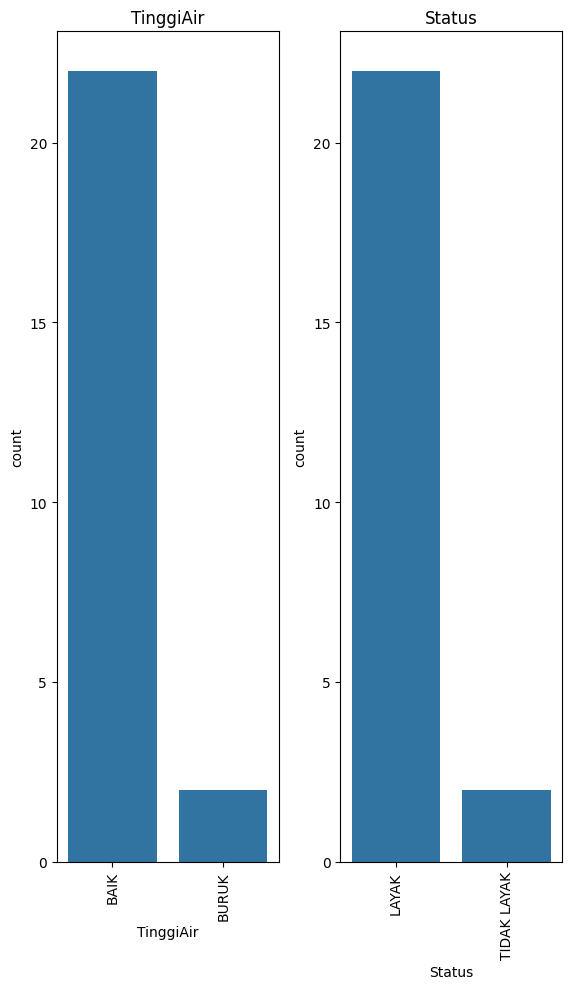

In [ ]:
plt.figure(figsize=(20, 10))

cat = kapal.drop(['No', 'Nama Kapal', 'ID Kapal', 'Jumlah ABK', 'Jumlah Penumpang', 'Radio', 'Kompas', 'Radar', 'Life Jacket', 'Pemadan', 'Sekoci'], axis=1).columns

for i, column in enumerate(cat):
    plt.subplot(1, 7, i+1)
    top_10_values = kapal[column].value_counts().head(10)
    sns.countplot(data=kapal, x=column, order=top_10_values.index)
    plt.title(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

<ipython-input-85-88dbccc6a7fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(kapal.corr(), ax=ax, annot=True)


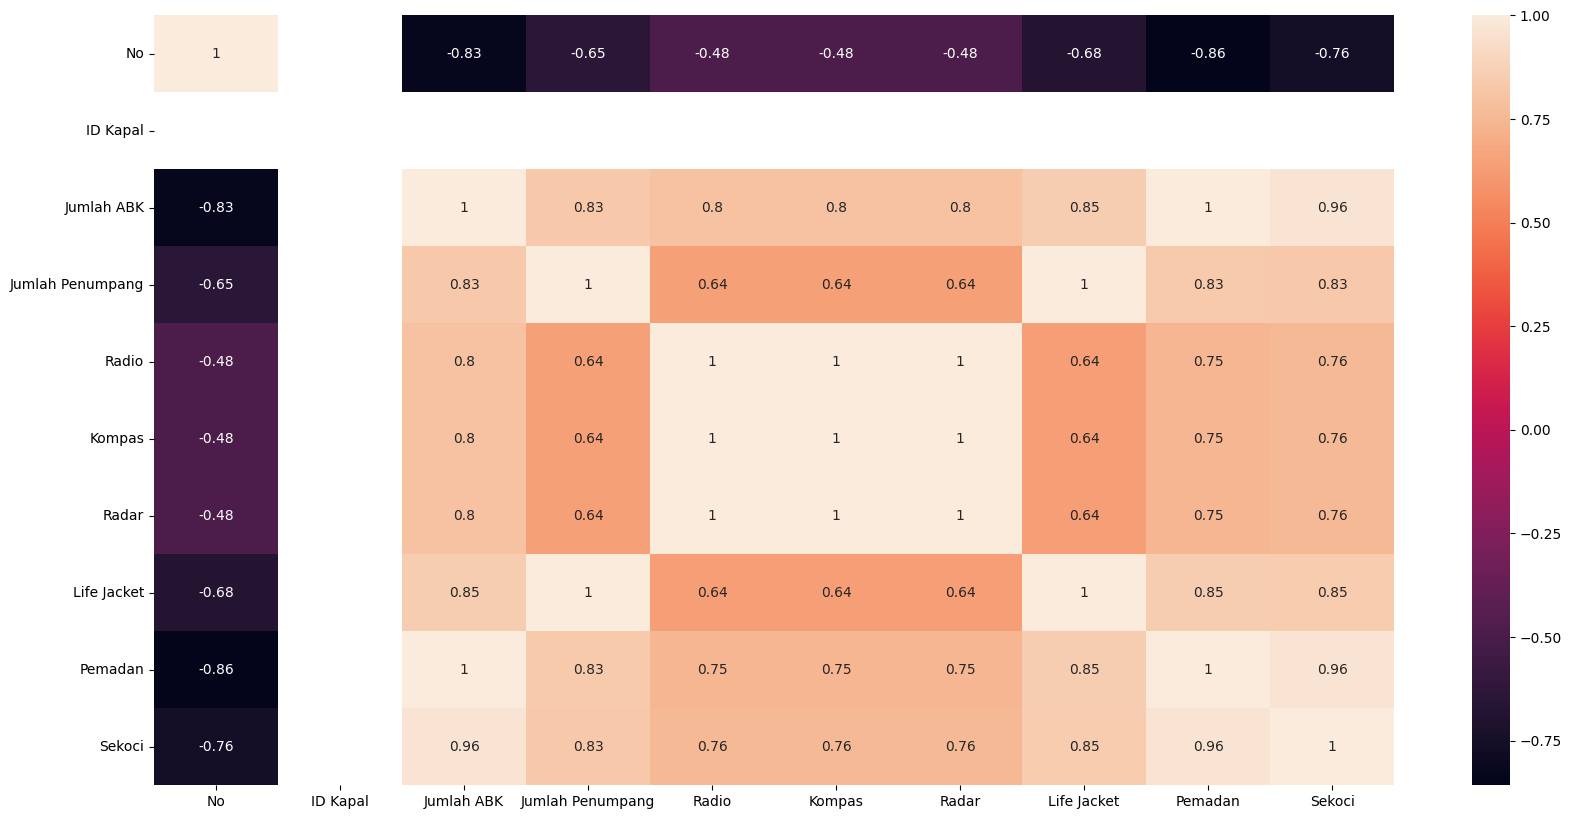

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(kapal.corr(), ax=ax, annot=True)
plt.show()

###Data Preparation

In [ ]:
kapal.head()

,No,Nama Kapal,ID Kapal,Jumlah ABK,Jumlah Penumpang,Radio,Kompas,Radar,Life Jacket,Pemadan,Sekoci,TinggiAir,Status
0,1,KM.GUNUNG DEMPO,525000000.0,97,1724,2,2,2,1936,125,8,BAIK,LAYAK
1,2,KM. NGGAPULU,525000000.0,97,2324,2,2,2,2596,125,12,BAIK,LAYAK
2,3,KM. BUKIT SIGUNTANG,525000000.0,97,2324,2,2,2,2596,125,12,BAIK,LAYAK
3,4,KM. LABOBAR,525000000.0,97,2324,2,2,2,2596,125,12,BAIK,LAYAK
4,5,KM. CIREMAI,525000000.0,97,829,2,2,2,1036,125,12,BAIK,LAYAK


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

kapal['TinggiAir'] = label_encoder.fit_transform(kapal['TinggiAir'])
kapal['Status'] = label_encoder.fit_transform(kapal['Status'])

In [ ]:
kapal.head()

,No,Nama Kapal,ID Kapal,Jumlah ABK,Jumlah Penumpang,Radio,Kompas,Radar,Life Jacket,Pemadan,Sekoci,TinggiAir,Status
0,1,KM.GUNUNG DEMPO,525000000.0,97,1724,2,2,2,1936,125,8,0,0
1,2,KM. NGGAPULU,525000000.0,97,2324,2,2,2,2596,125,12,0,0
2,3,KM. BUKIT SIGUNTANG,525000000.0,97,2324,2,2,2,2596,125,12,0,0
3,4,KM. LABOBAR,525000000.0,97,2324,2,2,2,2596,125,12,0,0
4,5,KM. CIREMAI,525000000.0,97,829,2,2,2,1036,125,12,0,0


In [ ]:
X = kapal.drop(columns = ['Status', 'No', 'Nama Kapal', 'ID Kapal'])
y = kapal['Status']

print("X : ", X.shape)
print("y : ", y.shape)

X :  (24, 9)
y :  (24,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(f"x_train : {x_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"y_test : {y_test.shape}")

x_train : (19, 9)
y_train : (19,)
x_test : (5, 9)
y_test : (5,)


###Modeling

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Akurasi KNN : {:.2f}%'.format(KNN_acc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Akurasi KNN : 100.00%


In [ ]:
testing = {'Jumlah ABK': [97],
        'Jumlah Penumpang': [800],
        'Radio': [2],
        'Kompas': [2],
        'Radar': [2],
        'Life Jacket': [1940],
        'Pemadan': [125],
        'Sekoci': [10],
        'TinggiAir': [1]}

testing = pd.DataFrame(testing)
testing

,Jumlah ABK,Jumlah Penumpang,Radio,Kompas,Radar,Life Jacket,Pemadan,Sekoci,TinggiAir
0,97,800,2,2,2,1940,125,10,1


In [ ]:
pred_coba = knn.predict(testing)
print("Hasil Prediksi :")
print(pred_coba)

Hasil Prediksi :
[0]
